### PROBLEM STATEMENT
A retail firm wants to understand their customers,and divide them into segments to
optimize the significance of each customer to the business.

### Objectives
Segment customers using a machine learning algorithm (KMeans Clustering) in
Python.

Who are your target customers with whom you can start a marketing
strategy?

**PROCESSES**

Understand the data

Drop features not needed for the clustering

Perform elbow method to find optimal number of clusters to be use for building the model

Training the model using unsupervised learning algorithm - KMeans to segment customers

Plotting the clusters


## Table Of Content
[Cleaning and understanding the Data](#.Cleaning-and-understanding-the-data)

Import necessary libraries

Check shape and info of data

Check for missing values in data

Drop features not needed

Prepare data for clustering

[Feature Engineering](#.Feature-Engineering)

Metrics that represent customers behaviour were created to from the already existing variables. The metrics includes Recency,Frequency and Monetary. Segmentation will be done using these metrics.

[Data preprocessing for modelling](#.Data-preprocessing-for-modelling)

Here, the metrics are transformed using the square root function to enhace the KMeans clustering.

[Perform Elbow Method to find the optimal number of clusters](#.Elbow-Plot)

KMeans form of clustering is used in this project were an iteration from 1-11 is clustered and plotted using a elbow plot

After the number of clusters to be used is determined.

[Train the model](#.Training-model)

Initiate KMeans models with selected optimal number of clusters

Plot clusters to gain insight regarding our customers

[Analyzing each cluster](#.Analysing-Clusters)

Here, analysis of each cluster to regards Recency Frequency and Monetary value is provided.

[Merging and saving Data](#.Merging-and-saving-data)

Here clusters are merged with original data. Index is resetted and data saved.

[Conclusion and Recommendations](#.Conclusion-and-recommendation)

This is the final stage. It comprises the report on the the findings from the project and recomendations.


### Importing neccesary libraries 

In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# importing ML libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.preprocessing import OneHotEncoder

### Cleaning and understanding the data


In [2]:
# reading data. Date is parsed to maintain datetime type 
store = pd.read_csv('store_data.csv',parse_dates = ['Order Date'],encoding = 'latin1')
store

,Row ID,Order ID,Order Date,Customer ID,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity
0,42433,AG-2011-2040,2011-01-01,TB-11280,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2
1,22253,IN-2011-47883,2011-01-01,JH-15985,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3
2,48883,HU-2011-1220,2011-01-01,AT-735,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4
3,11731,IT-2011-3647632,2011-01-01,EM-14140,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3
4,22255,IN-2011-47883,2011-01-01,JH-15985,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,2014-12-31,EB-13975,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2
51286,47594,MO-2014-2560,2014-12-31,LP-7095,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1
51287,8857,MX-2014-110527,2014-12-31,CM-12190,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3
51288,6852,MX-2014-114783,2014-12-31,TD-20995,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1


In [3]:
print(f'The data contains {store.shape[0]} rows and {store.shape[1]} columns.')

The data contains 51290 rows and 13 columns.


### Exploratory data analysis

In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        51290 non-null  int64         
 1   Order ID      51290 non-null  object        
 2   Order Date    51290 non-null  datetime64[ns]
 3   Customer ID   51290 non-null  object        
 4   Country       51290 non-null  object        
 5   Market        51290 non-null  object        
 6   Region        51290 non-null  object        
 7   Product ID    51290 non-null  object        
 8   Category      51290 non-null  object        
 9   Sub-Category  51290 non-null  object        
 10  Product Name  51290 non-null  object        
 11  Sales         51290 non-null  float64       
 12  Quantity      51290 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 5.1+ MB


### Feature Engineering


##### Dropping columns not needed for model

In [5]:
df= store.drop(['Row ID','Country','Region','Product ID','Category','Sub-Category','Product Name','Quantity','Market'],
           axis = 'columns')
df

,Order ID,Order Date,Customer ID,Sales
0,AG-2011-2040,2011-01-01,TB-11280,408.300
1,IN-2011-47883,2011-01-01,JH-15985,120.366
2,HU-2011-1220,2011-01-01,AT-735,66.120
3,IT-2011-3647632,2011-01-01,EM-14140,44.865
4,IN-2011-47883,2011-01-01,JH-15985,113.670
...,...,...,...,...
51285,CA-2014-115427,2014-12-31,EB-13975,13.904
51286,MO-2014-2560,2014-12-31,LP-7095,3.990
51287,MX-2014-110527,2014-12-31,CM-12190,26.400
51288,MX-2014-114783,2014-12-31,TD-20995,7.120


#### Creating Snapshot date

Snapshot date is the date of report. This date should be current than the most current date in the dataset.



In [6]:
# sorting order date
df['Order Date'] = df['Order Date'].sort_values()
df.tail()

,Order ID,Order Date,Customer ID,Sales
51285,CA-2014-115427,2014-12-31,EB-13975,13.904
51286,MO-2014-2560,2014-12-31,LP-7095,3.990
51287,MX-2014-110527,2014-12-31,CM-12190,26.400
51288,MX-2014-114783,2014-12-31,TD-20995,7.120
51289,CA-2014-156720,2014-12-31,JM-15580,3.024


In [7]:
# Creating a snap shot date
current_date = pd.to_datetime('2015-01-01')


#### Creating numeric values for model

In [8]:
# finding number of order per customer
pf = df.groupby('Customer ID').agg({'Order ID':'nunique','Sales':'sum',
                                    'Order Date':lambda x:(current_date - x.max()).days}).round(2)
pf

,Order ID,Sales,Order Date
Customer ID,,,
AA-10315,19,13747.41,9
AA-10375,23,5884.20,7
AA-10480,20,17695.59,118
AA-10645,36,15343.89,27
AA-315,7,2243.26,3
...,...,...,...
YS-21880,26,18703.61,10
ZC-11910,1,7.17,201
ZC-21910,37,28472.82,4


**NB:**

**Sales - Monetary**

**Order Date - Recency**

**Order ID - Frequency** 

#### Renaming Columns

In [9]:
pf.rename({'Sales': 'Monetary','Order Date': 'Recency','Order ID':'Frequency'},axis =1,inplace = True)
pf

,Frequency,Monetary,Recency
Customer ID,,,
AA-10315,19,13747.41,9
AA-10375,23,5884.20,7
AA-10480,20,17695.59,118
AA-10645,36,15343.89,27
AA-315,7,2243.26,3
...,...,...,...
YS-21880,26,18703.61,10
ZC-11910,1,7.17,201
ZC-21910,37,28472.82,4


#### Checking for missing values

In [10]:
pf.isnull().sum()

Frequency    0
Monetary     0
Recency      0
dtype: int64

#### Statistical summary of columns

In [11]:
pf.describe()

,Frequency,Monetary,Recency
count,1590.000000,1590.000000,1590.000000
mean,16.196855,7951.259082,88.616981
std,10.619199,6936.570145,127.879879
min,1.000000,7.170000,1.000000
25%,6.000000,1674.810000,15.000000
50%,14.000000,6248.135000,41.000000
75%,26.000000,13133.100000,104.000000
max,41.000000,35668.120000,1119.000000


#### checking skewness of data

Text(0.5, 1.0, 'Recency Skewness')

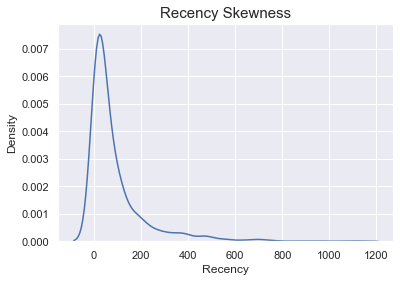

In [12]:
sns.kdeplot(data=pf, x='Recency');
plt.title('Recency Skewness',fontsize= 15)

Text(0.5, 1.0, 'Frequency Skweness')

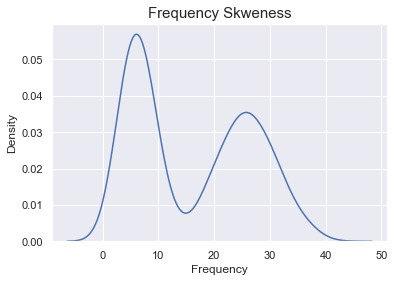

In [13]:
sns.kdeplot(data=pf, x='Frequency')
plt.title('Frequency Skweness',fontsize= 15)

# Binomial distribution

Text(0.5, 1.0, 'Monetary Skewness')

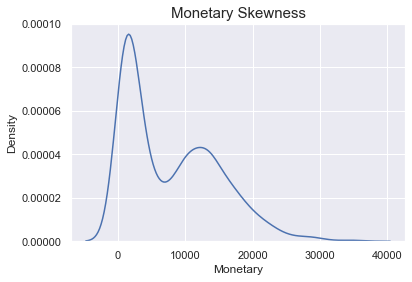

In [14]:
sns.kdeplot(data=pf, x='Monetary')
plt.title('Monetary Skewness',fontsize= 15)
# Binomial distribution

### Data preprocessing for modelling

### Transforming Data

**Standardizing data using the StandardScaler from Sklearn library. This will be done by taking the feature and substracting the mean from the values and dividing by the features standard deviation. This allows the KMeans cluster algorithm work efficiently**

In [15]:
# transforming the data
# log is used when data is skewed to the right
# sqrt used when data is skewed to the left
sf = np.sqrt(pf)
sf

,Frequency,Monetary,Recency
Customer ID,,,
AA-10315,4.358899,117.249350,3.000000
AA-10375,4.795832,76.708539,2.645751
AA-10480,4.472136,133.024772,10.862780
AA-10645,6.000000,123.870457,5.196152
AA-315,2.645751,47.363066,1.732051
...,...,...,...
YS-21880,5.099020,136.761142,3.162278
ZC-11910,1.000000,2.677686,14.177447
ZC-21910,6.082763,168.738911,2.000000


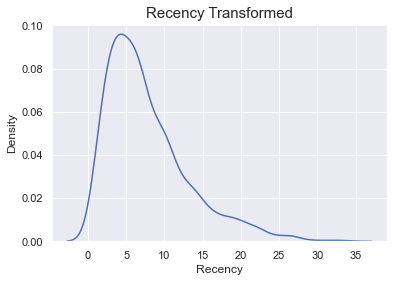

In [17]:
plt.title('Recency Transformed',fontsize= 15)
sns.kdeplot(data=sf, x='Recency');

Text(0.5, 1.0, 'Frequency Transformed')

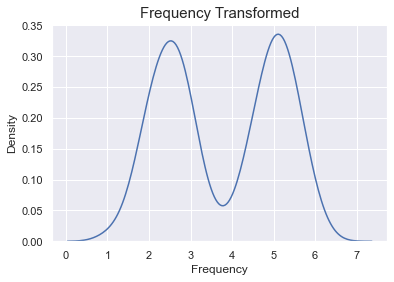

In [18]:
sns.kdeplot(data=sf, x='Frequency');
plt.title('Frequency Transformed',fontsize= 15)

Text(0.5, 1.0, 'Monetary Transformed')

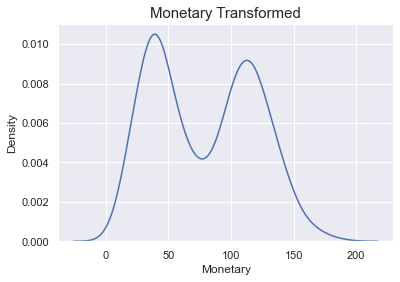

In [19]:
sns.kdeplot(data=sf, x='Monetary');
plt.title('Monetary Transformed',fontsize= 15)

#### Scaling data to fit into model

In [20]:
# Scaling the data
scaler =StandardScaler()

In [21]:
# fitting StandardScaler to data
scaled_df= scaler.fit_transform(sf)
scaled_df

array([[ 0.41832531,  0.92522539, -0.88748128],
       [ 0.7300995 , -0.055883  , -0.95371493],
       [ 0.49912583,  1.30699869,  0.58261774],
       ...,
       [ 1.64839192,  2.17129915, -1.07445064],
       [-0.55131998, -0.5975707 , -1.07445064],
       [ 0.49912583,  0.44393896, -1.18397475]])

In [22]:
# empty list for clustering
wc=[]

In [23]:
# empty list for clustering
wc=[]

# initiating clusters
for i in range (1,11):
    kmeans = KMeans(n_clusters =i,random_state = 0)
    kmeans.fit(scaled_df)
    wc.append(kmeans.inertia_)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


### Elbow Plot
This is used to determine suitable number of clusters

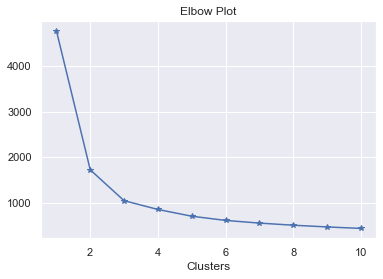

In [24]:
plt.plot(range(1,11),wc,marker = '*')
plt.title("Elbow Plot")
plt.xlabel('Clusters')
# plt.ylabel('')
plt.show()

### Training model 

In [25]:
# number of cluster to be used 3
kmeans = KMeans(n_clusters =3,random_state = 0)

In [26]:
kmeans.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [27]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, ..., 1, 0, 1])

In [28]:
pf['Clusters'] = clusters

#### Clustered dataset

In [29]:
pf

,Frequency,Monetary,Recency,Clusters
Customer ID,,,,
AA-10315,19,13747.41,9,1
AA-10375,23,5884.20,7,1
AA-10480,20,17695.59,118,1
AA-10645,36,15343.89,27,1
AA-315,7,2243.26,3,0
...,...,...,...,...
YS-21880,26,18703.61,10,1
ZC-11910,1,7.17,201,2
ZC-21910,37,28472.82,4,1


### Analysing Clusters

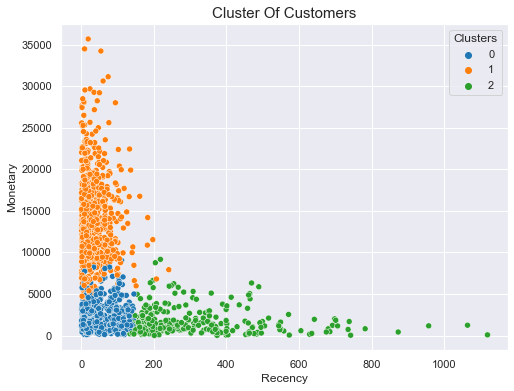

In [30]:
# analysing recency and frequency

fig,ax= plt.subplots(figsize=(8,6))

sns.scatterplot(data = pf, x = 'Recency', y = 'Monetary', hue = 'Clusters',
                palette = 'tab10')
ax.set_title('Cluster Of Customers',fontsize= 15)

plt.show()


### Grouping and aggregating clusters

In [31]:
# aggregating clusters by mean and count
sd = pf.groupby('Clusters').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)
sd

Recency Frequency Monetary      
            mean      mean     mean count
Clusters                                 
0           57.0       7.0   2300.0   530
1           32.0      26.0  13925.0   786
2          312.0       5.0   1747.0   274

### Statistical summary of each cluster

In [32]:
# mapping clusters with names
segments = {0:'Medium' ,1:'High' ,2:'Low'}
pf['Segments'] = pf['Clusters'].map(segments)
pf
 

,Frequency,Monetary,Recency,Clusters,Segments
Customer ID,,,,,
AA-10315,19,13747.41,9,1,High
AA-10375,23,5884.20,7,1,High
AA-10480,20,17695.59,118,1,High
AA-10645,36,15343.89,27,1,High
AA-315,7,2243.26,3,0,Medium
...,...,...,...,...,...
YS-21880,26,18703.61,10,1,High
ZC-11910,1,7.17,201,2,Low
ZC-21910,37,28472.82,4,1,High


In [33]:
medium = pf.loc[pf['Clusters']== 0]
medium.describe()

,Frequency,Monetary,Recency,Clusters
count,530.000000,530.000000,530.000000,530.0
mean,7.109434,2299.608094,56.681132,0.0
std,2.625904,1646.871340,41.711656,0.0
min,2.000000,110.480000,1.000000,0.0
25%,5.000000,1138.410000,20.000000,0.0
50%,7.000000,1884.000000,49.000000,0.0
75%,9.000000,3057.247500,93.750000,0.0
max,20.000000,9027.480000,146.000000,0.0


In [34]:
high=pf.loc[pf['Clusters']== 1]
high.describe()

,Frequency,Monetary,Recency,Clusters
count,786.000000,786.000000,786.000000,786.0
mean,26.173028,13924.904517,32.407125,1.0
std,4.866690,4896.395605,32.299430,0.0
min,15.000000,4629.700000,1.000000,1.0
25%,23.000000,10470.612500,9.000000,1.0
50%,26.000000,13201.355000,21.000000,1.0
75%,29.000000,16705.740000,44.750000,1.0
max,41.000000,35668.120000,241.000000,1.0


In [35]:
low =pf.loc[pf['Clusters']== 2]
# ac.describe()
low

,Frequency,Monetary,Recency,Clusters,Segments
Customer ID,,,,,
AA-375,8,654.49,182,2,Low
AA-480,5,2063.49,315,2,Low
AB-15,5,4607.13,413,2,Low
AB-150,4,3143.88,399,2,Low
AC-660,4,2676.09,298,2,Low
...,...,...,...,...,...
VG-11790,4,386.17,161,2,Low
VP-11730,4,432.00,163,2,Low
WB-11850,2,182.53,145,2,Low


### Merging and saving data

### Analyzing Clusters

From above,

Cluster 0 has 530 customers

Cluster 1 has 786 customers

Cluster 2 has 274 customers

Customers in Cluster 1 - High

Customers in cluster 1 are the largest customer group and most active with a recency of 32.0 on average and they purchase the company's products more than customers in the other clusters. On average, they have had 26 transactions with the company within the years. They also contribute to the highest monetary value of about 13925.0 on average to the company. The company must put in an effort to maintain relationships with these as they are highly valuable.

Customers in Cluster 2 - Low

The least portion of the company's customers falls within this cluster. A customer in this cluster makes 5.0 transactions on the average yielding an average monetary value of 1747.0 to the company. These customers have the potential to spend more. The company should put up strategies to attract these customers more.

Customers in Cluster 0 -Medium

This is the second-largest group of customers and the second least in terms of activeness. However, the bridge between these customers and ones in cluster 1 is wide apart in terms of activeness. On average, the last time a customer in this group made a transaction with the company was about 7 months away from the snap-shot date. These customers however have a higher monetary value being the second highest at 2300.0 on the average. They are the second most important customer group to the company. The company should research more about their preferences and devise more strategies to attract and satisfy them since they are also the second cluster contributing to a higher monetary value of the company.

#### Reseting data index

In [36]:
# reseting index of pf data 
pf = pf.reset_index()


# extracting CUSTOMER ID and SEgment from data pf
clusters = pf[['Customer ID', 'Segments']]

#### Merging clusters to original data

In [37]:
# merging original dataset with clusters and customer ID
final_CSA = pd.merge(left =store, right=clusters , how ='inner',on ='Customer ID')
final_CSA.head()

,Row ID,Order ID,Order Date,Customer ID,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Segments
0,42433,AG-2011-2040,2011-01-01,TB-11280,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,Low
1,47809,RS-2011-4710,2011-02-14,TB-11280,Russia,EMEA,EMEA,OFF-SAN-10004881,Office Supplies,Art,"Sanford Pencil Sharpener, Easy-Erase",27.09,1,Low
2,46608,ML-2012-2380,2012-08-14,TB-11280,Mali,Africa,Africa,TEC-STA-10004536,Technology,Machines,"StarTech Inkjet, Wireless",301.77,1,Low
3,43734,CA-2014-240,2014-03-18,TB-11280,Canada,Canada,Canada,OFF-ELD-10001477,Office Supplies,Storage,"Eldon Lockers, Single Width",197.94,1,Low
4,43730,CA-2014-240,2014-03-18,TB-11280,Canada,Canada,Canada,OFF-TEN-10004270,Office Supplies,Storage,"Tenex File Cart, Single Width",134.16,1,Low


### Saving merged data

In [38]:
# saving final dataset
final_CSA.to_csv('Customer Segmentation.csv', index = False)

### Conclusion and recommendation

On a general note, the company has a low customer retention rate. Customer retention is the process of attracting repeat customers and keeping them from switching to a competitor.

My recommendations include these strategies to improve their retention rate,

1. Develop customer relationship-building strategies

2. Determine customer lifetime value to show a customer's worth over a period of time. This strategy will help determine what the company should spend to engage their customers, especially in cluster 1 and can also help to predict revenue.

3. Reward loyalty

4. Based on the findings from analyzing the clusters, I recommend that the company should do further investigation into cluster 2 which is made up of inactive customers. This will inform the company of their needs and target them with their preferred products.

5. I also recommend that more analysis should be done into the products the various clusters are affiliated with to enhance target marketing and cross-selling.